<a href="https://colab.research.google.com/github/lauramaria99/PracticasPython/blob/main/Practica_4_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import scipy.io as sio;
import scipy.signal as signal
warnings.filterwarnings("ignore") #Se ignoran las alertas para mejorar la visualización.

### **Desarrollo**

1. Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 60,
120 y 360 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal,
y utilice la frecuencia de muestreo necesaria para representarla.

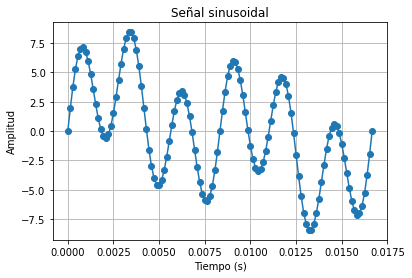

In [ ]:
# Frecuencias fundamentales de las señales
Fo_60 = 60
Fo_120 = 120 
Fo_360 = 360
# Periodo fundamental de la señal
Tp_60 = 1/Fo_60 
#Frecuencia de muestreo de la señal
Fs = 7200 
T = 1/Fs # Periodo de muestreo
#Vector de tiempo
t=np.arange(0, Tp_60+T, T)
#Señal
x = 2*np.sin(2*np.pi*Fo_60*t)
y = 3*np.sin(2*np.pi*Fo_120*t)
z = 5*np.sin(2*np.pi*Fo_360*t)

senal=x+y+z

plt.plot(t, senal, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal sinusoidal')
plt.grid()
plt.show()

Para la creación de la señal en cuestión, que corresponde a la suma de tres componentes sinusoidales a diferentes frecuencias, es necesario la creación de un vector de tiempo, dicho vector de tiempo tiene asociada la frecuencia fundamental de la señal, por lo tanto fue necesario determinar esta frecuencia, en este caso se determinó que la frecuencia adecuada era de 60Hz, puesto que esta frecuencia contenia a las otras dos frecuencias 120 y 360 Hz que componian la señal. Así mismo, es necesario realizar la elección de la frecuencia de muestreo de la señal,la cual, se determinó a partir del teorema de Nyquist, que dice que la frecuencia de  muestreo debe ser mayor o igual a dos veces la frecuencia máxima de la señal. Por lo tanto se tomó como referencia la frecuencia de 360Hz y después de realizar varias pruebas de escritorio, se optó por tomar como frecuencia de muestreo una frecuencia 20 veces mayor que la frecuencia máxima de la señal, pues con este valor, la gráfica encontrada presentaba una buena definición y era posible observar su comportamiento con claridad.

2. Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 ciclos de
la señal).

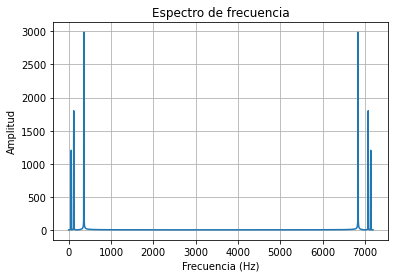

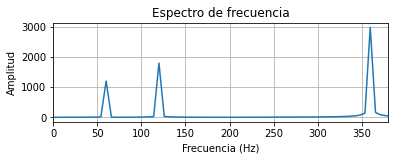

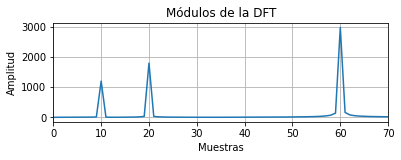

In [ ]:
#Vector de tiempo
t10=np.arange(0, 10*Tp_60+T, T) #10 primeros ciclos de la señal
#Señal
x10 = 2*np.sin(2*np.pi*Fo_60*t10)
y10 = 3*np.sin(2*np.pi*Fo_120*t10)
z10 = 5*np.sin(2*np.pi*Fo_360*t10)
senal10=x10+y10+z10

S10 = np.fft.fft(senal10)
N = len(S10)
F = np.arange(0,N)*Fs/N
n = int(np.ceil(N/2))
f = np.arange(0,n)*Fs/N
S10_m = S10[0:n]
#Espectro de frecuencia
plt.plot(F,abs(S10))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectro de frecuencia')
plt.grid()
plt.show()
#Espectro de frecuencia sin alias
plt.subplot(2,1,1)
plt.plot(f,abs(S10_m))
plt.xlim(0,380)
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectro de frecuencia')
plt.grid()
plt.show()
#Módulos de la DFT
plt.subplot(2,1,2)
plt.plot(abs(S10_m))
plt.xlim(0,70)
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.title('Módulos de la DFT')
plt.grid()
plt.show()



En la imagenes presentadas es posible observar el espectro de frecuencia de la señal sinusoidal, donde se aprecia que los picos representativos se encuentran en 60, 120 y 360Hz los cuales coinciden con las frecuencias que posee la señal, lo que corrobora que la señal se construyó correctamente. Por otro lado, se observa que en la primera gráfica hay más de tres picos en el espectro de frecuencias, esto se debe a la presencia de alias, por lo tanto se recorta el espectro por la mitad, para solo observar los picos reales, finalmente se observa una tercera gráfica, la cual indica en que posiciones de las componentes frecuenciales de la señal.

3. Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.
Aplíquelo a la señal anterior.

Text(0.5, 1.0, 'Transformada inversa de fourier')

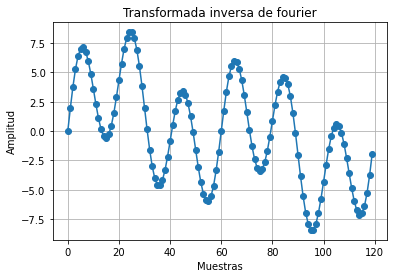

In [ ]:
#Comando para calcular la transformada inversa de fourier
S10_in=np.fft.ifft(S10)
plt.plot(S10_in[0:120],marker='o')
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.grid()
plt.title('Transformada inversa de fourier')

4. ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?
Extraiga de manera similar cada una de las componentes de la señal.

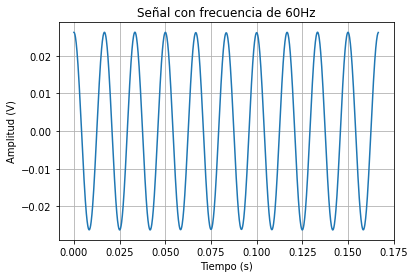

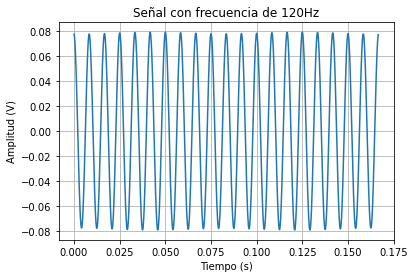

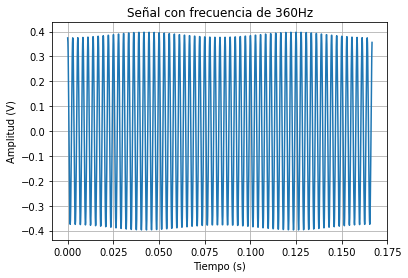

In [ ]:
#Frecuencia de 60Hz
F1 = np.fft.fft(senal10);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t10, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)', title='Señal con frecuencia de 60Hz')
plt.grid()
plt.show()

#Frecuencia de 120Hz
F1 = np.fft.fft(senal10);
F2 = np.zeros((len(F1)));
F2[19:23] = F1[19:23];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t10, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)', title='Señal con frecuencia de 120Hz');
plt.grid()
plt.show()

#Frecuencia de 360Hz
F1 = np.fft.fft(senal10);
F2 = np.zeros((len(F1)));
F2[59:63] = F1[59:63];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t10, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)', title='Señal con frecuencia de 360Hz');
plt.grid()
plt.show()

En las anteriores líneas de código sí se aplica un filtro debido a que al implementar la FFT a la señal de interés, la función que esta cumple es pasar la señal desde el dominio del tiempo a frecuencia, lo que permite identificar con facilidad las componentes de ella en 60, 120 y 360Hz determinando las posiciones correspondientes a estas, posteriormente, cuando se aplica la inversa de la FFT se reconstruye la señal limitando a obtener las componentes reales correspondientes al rango de posiciones donde se encuentre la frecuencia requerida, además al identificar el rango donde se encuentra el ruido de cada una de las frecuencias este es seleccionado para reemplazar sus valores por una lista de ceros y así aplicar la transformada inversa obteniendo la señal filtrada la cual es reconstruida en el rango de frecuencias seleccionado. 

5. El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis de la señal y determine si es necesario eliminar ruido, en tal caso, elimínelo y compruebe que lo haya realizado (calcule la transformada inversa de Fourier de la señal filtrada).

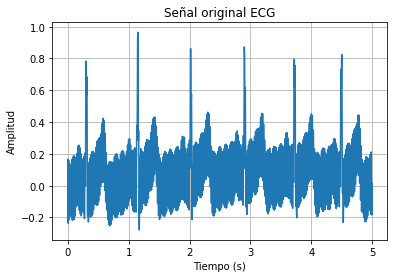

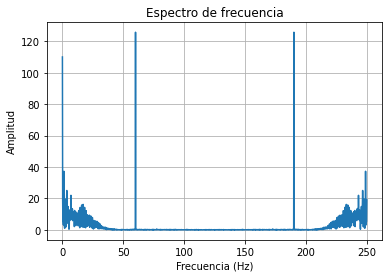

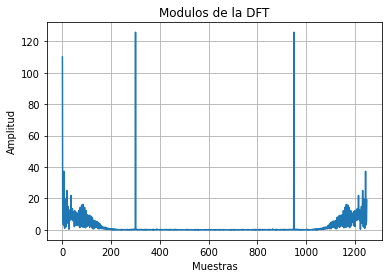

In [ ]:
#Se carga y grafica la señal original.
mat_contents = sio.loadmat('senecg.mat')
ecg = np.squeeze(mat_contents['ECG'])
t=np.arange(0,len(ecg)/250,1/250)
plt.plot(t,ecg)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal original ECG")
plt.grid()
plt.show()

#Aplicación de la FFT
ecg_=np.fft.fft(ecg)

#Espectro de frecuencia
N = len(ecg_)
F = np.arange(0,N)*250/N
plt.plot(F,abs(ecg_))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectro de frecuencia')
plt.grid()
plt.show()

#Modulos de la DFT
plt.plot(abs(ecg_))
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.title('Modulos de la DFT')
plt.grid()
plt.show()

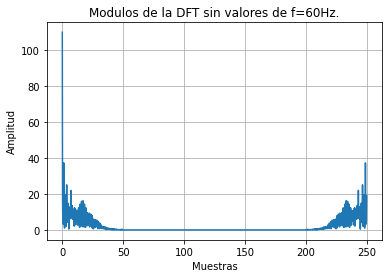

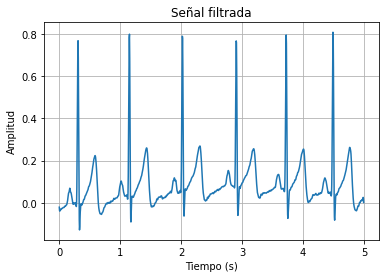

In [ ]:
#Se eliminan los valores de la señal con una frecuencia de 60Hz.
ecg_[250:1000]=0
plt.plot(F,abs(ecg_))
plt.ylabel("Amplitud")
plt.xlabel("Muestras")
plt.title("Modulos de la DFT sin valores de f=60Hz.")
plt.grid()
plt.show()

#Se aplica la FFT y se grafica la señal 
XR = np.fft.ifft(ecg_)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(XR))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud', title='Señal filtrada');
plt.grid()
plt.show()

Al observar la señal original ECG en el dominio del tiempo, se tiene que hay algunas amplitudes que son aproximadamente 1, es decir valores muy por encima del rango donde se encuentran la mayoría de datos obtenidos los cuales muestran una amplitud de aproximadamente 0.4; es por eso que es necesario eliminar esas amplitudes que no corresponden a una señal limpia.
En este orden de ideas, se procede a obtener el módulo de la DFT, para obtener las muestras de la señal con ayuda de la transformada rápida de Fourier y así identificar en qué rango de valores se encuentra la frecuecia de 60Hz la cual es eliminada haciendo que todos los valores de este rango sean cero como se muestra en la gráfica "Modulos de la DFT sin valores de f=60Hz", posteriormente se reconstruye la señal con ayuda de la transformada inversa de Fourier obteniendo finalmente la señal filtrada.

## **Conclusiones**

*   La transformada inversa de Fourier y la transformada rápida de Fourier son realmente útiles en el campo de las señales medicas debido a que después de analizar una señal y determinar que necesita eliminación de valores atípicos la aplicación de estas dos herramientas permiten que la señal sea mas limpia evaluando en que frecuencias se encuentra la mayor parte de ruido y posteriormente poder reconstruir la señal filtrada con valores significativos. 
*   La determinación de la frecuencia de muestreo de una señal es un paso de vital importancia, pues una correcta elección de esta asegura que la señal representada contiene  las caracteristicas representativas de la señal y el comportamiento que se describe es el adecuado.
*   A la hora de  realizar el análisis frecuencial de señales se debe tener en cuenta que al realizar la transformada rápida de Fourier aparecen alias, que son falsos módulos del espectro de frecuencia, por lo tanto es necesario hacer el análisis solo sobre los módulos reales.